# [Data Augmentation](https://www.kaggle.com/dansbecker/data-augmentation)

Let's start things off with a video, shall we?

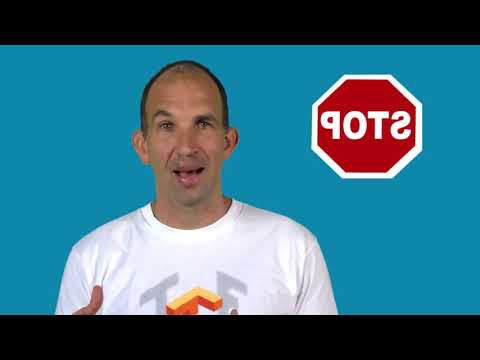

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ypt_BAotCLo', width=800, height=450)

You can embed videos from [YouTube](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.YouTubeVideo) or [Vimeo](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.VimeoVideo).  
Have fun with that.  
Anyhow:

In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = 'inputs/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Don't forget, your first layer is already trained.
my_new_model.layers[0].trainable = False

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
my_new_model

In [4]:
dir(my_new_model)

['__call__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_variable_with_custom_getter',
 '_assert_input_compatibility',
 '_base_init',
 '_base_name',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_collected_trainable_weights',
 '_compute_previous_mask',
 '_deferred_dependencies',
 '_dtype',
 '_eager_set_inputs',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_feed_loss_fns',
 '_feed_output_names',
 '_feed_output_shapes',
 '_feed_outputs',
 '_feed_sample_weight_modes',
 '_feed_sample_weights',
 '_feed_targets',
 '_function_kwargs

### Fitting a Model Using Data Augmentation

In [6]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(horizontal_flip=True,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2)

train_generator = data_generator_with_aug.flow_from_directory('inputs/rural_and_urban_photos/train',
                                                             target_size=(image_size, image_size),
                                                             batch_size=24,
                                                             class_mode='categorical')

data_generator_no_aug = ImageDataGenerator()
validation_generator = data_generator_no_aug.flow_from_directory('inputs/rural_and_urban_photos/val',
                                                               target_size=(image_size, image_size),
                                                               class_mode='categorical')

my_new_model.fit_generator(train_generator,
                          steps_per_epoch=3,
                          epochs=2,
                          validation_data=validation_generator,
                          validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/2
3/3 [==============================] - 14s 5s/step - loss: 0.9446 - acc: 0.5972 - val_loss: 0.7813 - val_acc: 0.5000
Epoch 2/2
3/3 [==============================] - 13s 4s/step - loss: 0.5822 - acc: 0.6944 - val_loss: 0.5678 - val_acc: 0.7000


# [Exercise: Data Augmentation](https://www.kaggle.com/dansbecker/exercise-data-augmentation)